# <span>Analisando os dados</span>
<hr style="border:2px solid #0077b9;">

<br/>

<div style="text-align: center;font-size: 90%;">
    Autor: Flávio Belizário da Silva Mota
    <br/><br/>
    Instituto Nacional de Pesquisas Espaciais (INPE)
    <br/>
    Avenida dos Astronautas, 1758, Jardim da Granja, São José dos Campos, SP 12227-010, Brazil
    <br/><br/>
    Contato: <a href="mailto:flavio.belizario.mota@gmail.com">flavio.belizario.mota@gmail.com</a>
    <br/>
    Professor: Rafael Santos
</div>

<br/>

<div style="text-align: justify;  margin-left: 25%; margin-right: 25%;">
<b>Objetivo.</b> Esse caderno Jupyter tem como objetivo apresentar a análise dos dados para o projeto da disciplina CAP394 - Introdução à Ciência de Dados. Os dados são provenientes do projeto CRISIS NLP e foram coletados utilizando publicações do Twitter referentes à pandemia de COVID-19. O conjunto utilizado para a análise foi coletado e tratado em uma etapa prévia (vide: coleta) e contém informações sobre data de criação de uma publicação, origem da informação geolocalizada do dado e o estado e cidade de origem da publicação.
</div>

<br/>
<div style="text-align: center;font-size: 90%;">
    <b>Os dados podem ser encontrados em:</b>
    <div style="margin-left: 10px; margin-right: 10px">
    https://crisisnlp.qcri.org/covid19
    </div>
</div>

## Analisando os dados
<hr style="border:2px solid #0077b9;">

### O conjunto de dados
<hr style="border:1px solid #0077b9;">

O conjunto de dados empregado nas análises a seguir foi elaborado na etapa de coleta e tratamento deste trabalho (vide: coleta). Em resumo, são dados provenientes de publicações do Twitter referentes à pandemia de COVID-19. Especificamente, o conjunto a seguir contém informações sobre a data de criação, fonte das informações geolocalizadas do dado e cidade e estado de publicações com origem no Brasil entre os dias 19 de fevereiro e 20 de março de 2020.
<br><br>
Vamos iniciar nossa análise carregando o conjunto. Bibliotecas necessárias para a análise serão importadas ao longo do caderno.

In [1]:
import pandas as pd
df = pd.read_csv('tweets_covid_brasil.csv')
df

,created_at,geo_source,estado,cidade
0,2020-02-19 16:42:08+00:00,user_location,São Paulo,São Paulo
1,2020-02-19 19:49:00+00:00,user_location,São Paulo,São Paulo
2,2020-02-19 18:04:27+00:00,user_location,Minas Gerais,Belo Horizonte
3,2020-02-19 20:10:17+00:00,user_location,São Paulo,NaN
4,2020-02-19 18:47:44+00:00,user_location,Maranhão,NaN
...,...,...,...,...
1863367,2020-03-20 08:44:49+00:00,user_location,Rondônia,NaN
1863368,2020-03-20 10:57:02+00:00,user_location,NaN,NaN
1863369,2020-03-20 12:03:33+00:00,user_location,NaN,NaN
1863370,2020-03-20 09:50:36+00:00,user_location,NaN,NaN


O conjunto possui 1.863.372 registros (ou linhas) e 4 colunas.

### Descrevendo o conjunto
<hr style="border:1px solid #0077b9;">

Vamos visualizar uma descrição básica dos dados:

In [2]:
df.describe()

,created_at,geo_source,estado,cidade
count,1863372,1863372,968815,622949
unique,1083140,3,28,1893
top,2020-03-15 02:21:53+00:00,user_location,São Paulo,Rio de Janeiro
freq,15,1833373,303951,106331


Através dessa simples descrição já podemos extrair algumas informações interessantes como:

<ul>
    <li>A quantidade de registros com valores preenchidos não é a mesma para todos os campos. Enquanto <code>created_at</code> e <code>geo_source</code> possuem uma contagem de linhas iguais ao tamanho do DataFrame, <code>estado</code> e <code>cidade</code> têm menos registros, o que indica a presença de valores nulos.</li>
    <li>Existem 3 valores únicos para o campo <code>geo_source</code> (o que condiz com o tratamento feito anteriormente), 28 valores únicos para <code>estado</code> e 1893 valores únicos para <code>cidade</code>. Sabemos que no Brasil existem 26 estados, mais o Distrito Federal, então o valor 28 deve ser investigado. Já para as cidades, o valor fica abaixo do número de 5570 municípios que consta na listagem do IBGE.</li>
    <li>Em relação ao valor mais frequente, é possível dizer que <code>user_location</code> foi a fonte mais comum das informações geolocalizadas desses dados. São Paulo lidera como o estado com maior número de publicações geolocalizadas, mas é a cidade do Rio de Janeiro que detém o maior número de publicações.</li>
</ul>
<br>
Essa descrição não apresenta dados estatísticos como média, mediana, mínimos e máximos (apesar dos campos <code>count</code> e <code>top</code>) porque a biblioteca <code>pandas</code> entendeu que todos os dados são categoricos, o que é verdade para a maioria deles, mas não todos. Vamos abordar a questão dos tipos a seguir.
<br>
Podemos analisar quais são os valores únicos das colunas <code>geo_source</code>, <code>estado</code> e <code>cidade</code>.

In [3]:
df['geo_source'].unique()

array(['user_location', 'place', 'coordinates'], dtype=object)

O campo <code>geo_source</code> contém os valores 'user_location', 'place' e 'coordinates', o que está de acordo com as informações selecionadas no momento da coleta dos dados.

In [4]:
df['estado'].unique()

array(['São Paulo', 'Minas Gerais', 'Maranhão', nan, 'Rio de Janeiro',
       'Rio Grande do Sul', 'Santa Catarina', 'Pará', 'Bahia', 'Paraíba',
       'Paraná', 'Acre', 'Amazonas', 'Pernambuco', 'Mato Grosso', 'Amapá',
       'Espírito Santo', 'Piauí', 'Ceará', 'Rondônia', 'Goiás',
       'Rio Grande do Norte', 'Mato Grosso do Sul', 'Tocantins',
       'Sergipe', 'Roraima', 'Alagoas', 'Federal District',
       'South Region'], dtype=object)

Aqui podemos ver que o campo <code>estado</code> contém os 26 estados brasileiros, o Distrito Federal (que aqui recebeu o nome de 'Federal District'), valores nulos (representado pelo valor 'nan') e um valor chamado 'South Region'. Consultando a <a href="https://developer.twitter.com/en/docs/tutorials/advanced-filtering-for-geo-data">documentação dos dados do Twitter</a>, verificamos que o campo <code>state</code> fornecido pode estar relacionado também com província por conta de outros países e, nesse caso, 'South Region' faz referência à toda região sul do Brasil. Mais adiante, podemos analisar a relação dos registros com esse valor para o estado e tentar correlacionar a cidade com o estado.

In [5]:
df['cidade'].unique()

array(['São Paulo', 'Belo Horizonte', nan, ..., 'Ipuaçu', 'Nioaque',
       'Conselheiro Mairinck'], dtype=object)

Para o campo <code>cidade</code>, como vimos na descrição acima, a quantidade de valores é muito grande para exibir todos unicamente.

### Tipos
<hr style="border:1px solid #0077b9;">

Vamos analisar os tipos de dados de cada uma das colunas:

In [6]:
df.dtypes

created_at    object
geo_source    object
estado        object
cidade        object
dtype: object

Nesse ponto, todas as colunas são do tipo <code>object</code> o que, pela documentação da biblioteca <code>pandas</code>, representa um tipo de "objeto arbitrário" que "deve ser evitado na medida do possível para desempenho e interoperabilidade com outras bibliotecas e métodos". Cadeias de caracteres também são entendidas pela biblioteca como sendo desse tipo.
<br><br>
Sendo assim, é adequado que os devidos ajustes nos tipos sejam feitos. No caso do conjunto de dados que estamos analisando, o ajuste a ser feito é na coluna referente à data de criação da publicação, uma vez que se trata de um <code>timestamp</code>. As demais colunas podem ser mantidas como o tipo <code>object</code> por se tratarem de cadeia de caracteres. 
<br><br>
Para converter o campo <code>created_at</code>, podemos empregar a função <code>to_datetime</code> da própria biblioteca:

In [7]:
df['created_at'] = pd.to_datetime(df['created_at'])
df.dtypes

created_at    datetime64[ns, UTC]
geo_source                 object
estado                     object
cidade                     object
dtype: object

Agora temos a coluna com o tipo mais adequado para o atributo <code>created_at</code>.

### Verficando a ausência de dados
<hr style="border:1px solid #0077b9;">

Uma questão importante antes de começarmos a trabalhar com os dados é verificar a quantidade de valores nulos, pois como vimos na seção de descrição dos dados, as colunas <code>estados</code> e <code>cidade</code> têm menos registros que o número total de registros do conjunto de dados. Podemos utilizar o comando a seguir para obter essa contagem:

In [8]:
df.isna().sum()

created_at          0
geo_source          0
estado         894557
cidade        1240423
dtype: int64

O atributo <code>estado</code> tem 894.557 registro nulos, o que também significa dizer que são <b>968.815</b> registros que foram preenchidos. Já  <code>cidade</code> tem 1.240.423 registros nulos, ou seja, <b>622.949</b> registros preenchidos. Isso se deve ao fato de que essas informaçõe não são obrigatoriamente preenchidas ou retornadas pelo Twitter. Vale lembrar que para a etapa de coleta dos dados, bastava que a publicação tivesse origem no Brasil.
<br>
Como não é possível inferir o estado e cidade de origem desses dados para preencher os valores ausentes, vamos criar uma categoria chamada 'N.I' (Não Informado) para esses dados. Podemos usar o código abaixo para realizar esse preenchimento:

In [9]:
df.fillna('N.I.', axis=1, inplace=True)

Podemos realizar a contagem dos valores nulos novamente para verificar se a alteração surtiu efeito:

In [10]:
df.isna().sum()

created_at    0
geo_source    0
estado        0
cidade        0
dtype: int64

### Aplicando algumas transformações
<hr style="border:1px solid #0077b9;">

Para facilitar a manipulação dos dados nas análises a seguir, vamos realizar pequenas tranformações no dado. Primeiramente, vamos criar um campo <code>sigla</code> baseado no nome do estado.

In [11]:
estados = {
    'Acre':'AC',
    'Alagoas':'AL',
    'Amapá':'AP',
    'Amazonas':'AM',
    'Bahia':'BA',
    'Ceará':'CE',
    'Federal District':'DF',
    'Espírito Santo':'ES',
    'Goiás':'GO',
    'Maranhão':'MA',
    'Mato Grosso':'MT',
    'Mato Grosso do Sul':'MS',
    'Minas Gerais':'MG',
    'Pará':'PA',
    'Paraíba':'PB',
    'Paraná':'PR',
    'Pernambuco':'PE',
    'Piauí':'PI',
    'Rio de Janeiro':'RJ',
    'Rio Grande do Norte':'RN',
    'Rio Grande do Sul':'RS',
    'Rondônia':'RO',
    'Roraima':'RR',
    'Santa Catarina':'SC',
    'São Paulo':'SP',
    'Sergipe':'SE',
    'Tocantins':'TO',
    'N.I.':'N.I'
}

df['sigla']=df['estado'].map(estados)
df

,created_at,geo_source,estado,cidade,sigla
0,2020-02-19 16:42:08+00:00,user_location,São Paulo,São Paulo,SP
1,2020-02-19 19:49:00+00:00,user_location,São Paulo,São Paulo,SP
2,2020-02-19 18:04:27+00:00,user_location,Minas Gerais,Belo Horizonte,MG
3,2020-02-19 20:10:17+00:00,user_location,São Paulo,N.I.,SP
4,2020-02-19 18:47:44+00:00,user_location,Maranhão,N.I.,MA
...,...,...,...,...,...
1863367,2020-03-20 08:44:49+00:00,user_location,Rondônia,N.I.,RO
1863368,2020-03-20 10:57:02+00:00,user_location,N.I.,N.I.,N.I
1863369,2020-03-20 12:03:33+00:00,user_location,N.I.,N.I.,N.I
1863370,2020-03-20 09:50:36+00:00,user_location,N.I.,N.I.,N.I


Vamos também separar a coluna <code>created_at</code> em duas colunas: 'data' e 'horario'.

In [12]:
df['data'] = pd.to_datetime(df['created_at']).dt.date
df['horario'] = pd.to_datetime(df['created_at']).dt.time
df

,created_at,geo_source,estado,cidade,sigla,data,horario
0,2020-02-19 16:42:08+00:00,user_location,São Paulo,São Paulo,SP,2020-02-19,16:42:08
1,2020-02-19 19:49:00+00:00,user_location,São Paulo,São Paulo,SP,2020-02-19,19:49:00
2,2020-02-19 18:04:27+00:00,user_location,Minas Gerais,Belo Horizonte,MG,2020-02-19,18:04:27
3,2020-02-19 20:10:17+00:00,user_location,São Paulo,N.I.,SP,2020-02-19,20:10:17
4,2020-02-19 18:47:44+00:00,user_location,Maranhão,N.I.,MA,2020-02-19,18:47:44
...,...,...,...,...,...,...,...
1863367,2020-03-20 08:44:49+00:00,user_location,Rondônia,N.I.,RO,2020-03-20,08:44:49
1863368,2020-03-20 10:57:02+00:00,user_location,N.I.,N.I.,N.I,2020-03-20,10:57:02
1863369,2020-03-20 12:03:33+00:00,user_location,N.I.,N.I.,N.I,2020-03-20,12:03:33
1863370,2020-03-20 09:50:36+00:00,user_location,N.I.,N.I.,N.I,2020-03-20,09:50:36


Anteriormente, percebemos a presença do valor 'South Region' no campo <code>estado</code>. Vamos verificar se nos registros onde esse valor ocorre, existem valores para o campo <code>cidade</code> que permitam criar uma função que associe um estado da região sul ao registro. Podemos fazer isso criando uma máscara que verifica se valor da coluna <code>estado</code> é igual a 'South Region' e se o valor da coluna <code>cidade</code> é diferente de "Não Informado":

In [13]:
mascara_south_region = (df['estado'] == 'South Region') & (df['cidade'] != 'N.I.')
df.loc[mascara_south_region]

,created_at,geo_source,estado,cidade,sigla,data,horario


Como não existe nenhum registro retornado, não é possível determinar quais os estados.

### Explorando o dado
<hr style="border:1px solid #0077b9;">

<AxesSubplot:xlabel='data'>

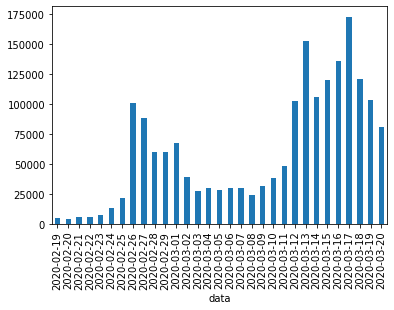

In [21]:
import matplotlib.pyplot as plt
df.groupby(df['data']).count()['created_at'].plot(kind="bar")

In [30]:
df.groupby(df['estado']).count().sort_values(by='created_at', ascending=False).reset_index().head(10)

,estado,created_at,geo_source,cidade,sigla,data,horario
0,N.I.,894557,894557,894557,894557,894557,894557
1,São Paulo,303951,303951,303951,303951,303951,303951
2,Rio de Janeiro,150043,150043,150043,150043,150043,150043
3,Minas Gerais,100475,100475,100475,100475,100475,100475
4,Rio Grande do Sul,75362,75362,75362,75362,75362,75362
5,Paraná,44120,44120,44120,44120,44120,44120
6,Paraíba,35019,35019,35019,35019,35019,35019
7,Santa Catarina,33094,33094,33094,33094,33094,33094
8,Maranhão,30700,30700,30700,30700,30700,30700
9,Pernambuco,29117,29117,29117,29117,29117,29117


In [32]:
df.groupby(['estado','cidade']).count().sort_values(by='created_at', ascending=False).reset_index().head(10)

,estado,cidade,created_at,geo_source,sigla,data,horario
0,N.I.,N.I.,894557,894557,894557,894557,894557
1,São Paulo,N.I.,175931,175931,175931,175931,175931
2,Rio de Janeiro,Rio de Janeiro,106331,106331,106331,106331,106331
3,São Paulo,São Paulo,79069,79069,79069,79069,79069
4,Minas Gerais,Belo Horizonte,43933,43933,43933,43933,43933
5,Rio Grande do Sul,Porto Alegre,36180,36180,36180,36180,36180
6,Minas Gerais,N.I.,30372,30372,30372,30372,30372
7,Paraíba,Patos,19630,19630,19630,19630,19630
8,Maranhão,N.I.,16529,16529,16529,16529,16529
9,Bahia,N.I.,16411,16411,16411,16411,16411


In [34]:
df.loc[df['estado'] != 'N.I.'].groupby(['data','estado']).count().sort_values(by='created_at', ascending=False).reset_index().head(10)

,data,estado,created_at,geo_source,cidade,sigla,horario
0,2020-03-17,São Paulo,24035,24035,24035,24035,24035
1,2020-03-13,São Paulo,21918,21918,21918,21918,21918
2,2020-03-16,São Paulo,19976,19976,19976,19976,19976
3,2020-03-15,São Paulo,18795,18795,18795,18795,18795
4,2020-03-18,São Paulo,17920,17920,17920,17920,17920
5,2020-02-26,São Paulo,17223,17223,17223,17223,17223
6,2020-03-12,São Paulo,17085,17085,17085,17085,17085
7,2020-03-14,São Paulo,15960,15960,15960,15960,15960
8,2020-03-17,Rio de Janeiro,15030,15030,15030,15030,15030
9,2020-03-19,São Paulo,14915,14915,14915,14915,14915
